# Term Frequency - Inverse Document Frequency (TF-IDF): Mathematics and R code

Case studies of text analysis, and I'll look at some common transformations we can make on these types of datasets. One issue with text data that we came across is that datasets like novels contain a lot of common "stop words" which don't carry much information, eg. "the", "and", "of", etc. We'd like to transform text data to emphasise the words which carry meaning, and even better, the words which help us distinguish between documents.

One common transformation to do this is called ***term frequency** - inverse document frequency (TF-IDF)*, and it works like this. For a given word or term t in a set of documents:


$$TF=\frac{Nt}{Tt}$$


Where **Nt = Number of instances of *t* in document**, **Tt = Total number of terms in document**


$$IDF=log(\frac{Td}{Dt})$$


Where **Td = Total number of documents**, **Tt = Number of documents in which *t* appears**

And then the **TF-IDF** transformation for t is the product of these two, $TF(t)×IDF(t)$. Each word now has a weight, based on how it appears across all documents. The beauty of this is that while TF gives higher weight to common words, IDF weights words which only occur in the few documents, so the product emphasises words which are distinguished between documents. Let's see it in action.

We're going to look at the words which distinguish between different eras in the history of physics. First, we'll need to download books by some physicists from Project Gutenberg:

In [4]:
library(tidyverse)
library(gutenbergr)
library(tidytext)
physics <- gutenberg_download(c(37729, 14725, 13476, 30155), 
                              meta_fields = "author")
physics_words <- physics %>%
  unnest_tokens(word, text) %>%
  count(author, word, sort = TRUE) %>%
  ungroup()

print(physics_words)

# A tibble: 12,671 x 3
   author              word      n
   <chr>               <chr> <int>
 1 Galilei, Galileo    the    3760
 2 Tesla, Nikola       the    3604
 3 Huygens, Christiaan the    3553
 4 Einstein, Albert    the    2993
 5 Galilei, Galileo    of     2049
 6 Einstein, Albert    of     2028
 7 Tesla, Nikola       of     1737
 8 Huygens, Christiaan of     1708
 9 Huygens, Christiaan to     1207
10 Tesla, Nikola       a      1176
# ... with 12,661 more rows


These famous scientists write "the" and "of" a lot. This is not very informative. Let's transform the data using **TF-IDF** and visualise the new top words using this weighting. We remove a curated list of stop words like "fig" for "figure", and "eq" for "equation", which appear in some of the books first:

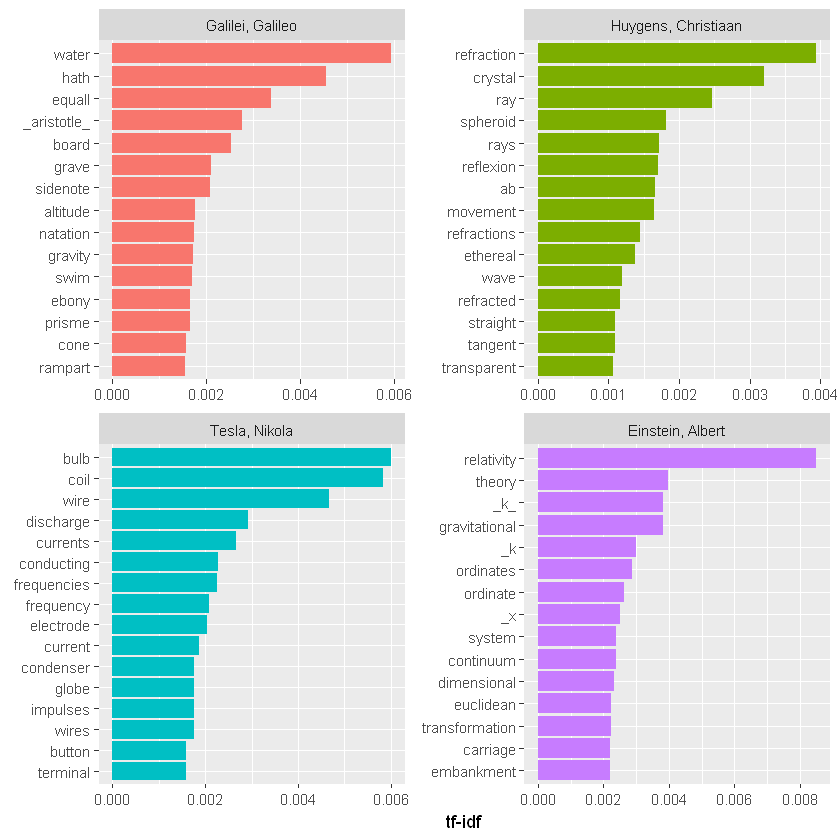

In [5]:
physics_words <- physics_words %>%
  bind_tf_idf(word, author, n) 

mystopwords <- tibble(word = c("eq", "co", "rc", "ac", "ak", "bn", 
                                   "fig", "file", "cg", "cb", "cm"))

physics_words <- anti_join(physics_words, mystopwords, by = "word")

plot_physics <- physics_words %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(author) %>% 
  top_n(15, tf_idf) %>%
  ungroup %>%
  mutate(author = factor(author, levels = c("Galilei, Galileo",
                                            "Huygens, Christiaan",
                                            "Tesla, Nikola",
                                            "Einstein, Albert")))

ggplot(plot_physics, aes(word, tf_idf, fill = author)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~author, ncol = 2, scales = "free") +
  coord_flip()

This reveals that:

  -  Galileo wrote more about "water" and "gravity"
  -  Huygens was most concerned with "refraction"
  -  Tesla was most concerned with electricity ("bulb", "coil", "wire")
  -  Einstein, of course, was concerned with "relativity".

That's a nice little potted history of a few hundred years of progress in physics, and all revealed algorithmically from the writings of the people themselves.